<a href="https://colab.research.google.com/github/chouhandiksha/bigdataproject/blob/colab/notebooks/Extract%20and%20Clean%20Chicago%20Census%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract and Clean Chicago Census Data

Instructions:

**Instructions:**
1. Mount the google drive to access the data by following **Steps to Mount the Drive**.
2. Provide the drive file path to the data, the state FIPS code, the county FIPS code, and the 5 digit combined FIPS codes in the fourth code cell.
 

**Steps to Mount the Drive:**

1. Execute the second code cell.
2. There will be a link to follow in order to authorize the google account for drive. Go to that link.
3. A code to authorize the google account will be generated. Copy the code generated.
4. Go back to the cell where the process of mounting the drive is running. Paste the generated code from step 3 to the text box in the cell and press enter.

In [ ]:
pip install geopandas

In [2]:
import geopandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

# Allow altair to visualize large datasets
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# state_fips = '06' # CA FIPS
# county_fips = {'037', '059'}  # 037 Los Angeles County, 059 Orange County
fips = ['17031','17037','17043','17063','17091','17089','17093','17111','17197','17097','18073','18089','18111','18127','55059']

source = Path('drive/MyDrive/big-data-project/data/unprocessed/census/safegraph_open_census_data/')
target = Path('drive/MyDrive/big-data-project/data/clean-data/')

Load file cbg_b01.csv from the SafeGraph Census data. 

The file contains data about population size and statistics related to race. 




| Column Name  | Description     |
| --------- | ------------------------------------------------------------ |
| B01003e1  | TOTAL POPULATION: Total: Total population  -- (Estimate)     |
| B01003m1  | TOTAL POPULATION: Total: Total population -- (Margin of Error) |
| B02001e1  | RACE: Total: Total population -- (Estimate)                  |
| B02001e10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Estimate) |
| B02001e2  | RACE: White alone: Total population -- (Estimate)            |
| B02001e3  | RACE: Black or African American alone: Total population -- (Estimate) |
| B02001e4  | RACE: American Indian and Alaska Native alone: Total population --  (Estimate) |
| B02001e5  | RACE: Asian alone: Total population -- (Estimate)            |
| B02001e6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Estimate) |
| B02001e7  | RACE: Some other race alone: Total population -- (Estimate)  |
| B02001e8  | RACE: Two or more races: Total population -- (Estimate)      |
| B02001e9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Estimate) |
| B02001m1  | RACE: Total: Total population -- (Margin of Error)           |
| B02001m10 | RACE: Two or more races: Two races excluding Some other race, and three  or more races: Total population -- (Margin of Error) |
| B02001m2  | RACE: White alone: Total population -- (Margin of Error)     |
| B02001m3  | RACE: Black or African American alone: Total population -- (Margin of  Error) |
| B02001m4  | RACE: American Indian and Alaska Native alone: Total population --  (Margin of Error) |
| B02001m5  | RACE: Asian alone: Total population -- (Margin of Error)     |
| B02001m6  | RACE: Native Hawaiian and Other Pacific Islander alone: Total population  -- (Margin of Error) |
| B02001m7  | RACE: Some other race alone: Total population -- (Margin of Error) |
| B02001m8  | RACE: Two or more races: Total population -- (Margin of Error) |
| B02001m9  | RACE: Two or more races: Two races including Some other race: Total  population -- (Margin of Error) |
| B02008e1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Estimate) |
| B02008m1  | WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: White  alone or in combination with one or more other races -- (Margin of Error) |
| B02009e1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Estimate) |
| B02009m1  | BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER  RACES: Total: Black or African American alone or in combination with one or  more other races -- (Margin of Error) |
| B02010e1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Estimate) |
| B02010m1  | AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR  MORE OTHER RACES: Total: People who are American Indian or Alaska Native  alone or in combination with one or more other races -- (Margin of Error) |
| B02011e1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Estimate) |
| B02011m1  | ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES: Total: Asian  alone or in combination with one or more other races -- (Margin of Error) |
| B02012e1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Estimate) |
| B02012m1  | NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH  ONE OR MORE OTHER RACES: Total: Native Hawaiian and Other Pacific Islander  alone or in combination with one or more other races -- (Margin of Error) |
| B02013e1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Estimate) |
| B02013m1  | SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES:  Total: Some other race alone or in combination with one or more other races  -- (Margin of Error) |
| B03002e1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Estimate) |
| B03002e10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Estimate) |
| B03002e11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Estimate) |
| B03002e13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Estimate) |
| B03002e14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Estimate) |
| B03002e15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Estimate) |
| B03002e16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Estimate) |
| B03002e17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Estimate) |
| B03002e19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Estimate) |
| B03002e2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Estimate) |
| B03002e20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Estimate) |
| B03002e21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Estimate) |
| B03002e3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Estimate) |
| B03002e4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Estimate) |
| B03002e5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Estimate) |
| B03002e6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Estimate) |
| B03002e7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Estimate) |
| B03002e8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Estimate) |
| B03002e9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Estimate) |
| B03002m1  | HISPANIC OR LATINO ORIGIN BY RACE: Total: Total population -- (Margin of  Error) |
| B03002m10 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races including Some other race: Total population -- (Margin of  Error) |
| B03002m11 | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m12 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Total population  -- (Margin of Error) |
| B03002m13 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: White alone: Total  population -- (Margin of Error) |
| B03002m14 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Black or African  American alone: Total population -- (Margin of Error) |
| B03002m15 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: American Indian  and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m16 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Asian alone: Total  population -- (Margin of Error) |
| B03002m17 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Native Hawaiian  and Other Pacific Islander alone: Total population -- (Margin of Error) |
| B03002m18 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Some other race  alone: Total population -- (Margin of Error) |
| B03002m19 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Total population -- (Margin of Error) |
| B03002m2  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Total  population -- (Margin of Error) |
| B03002m20 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races including Some other race: Total population -- (Margin of Error) |
| B03002m21 | HISPANIC OR LATINO ORIGIN BY RACE: Hispanic or Latino: Two or more races:  Two races excluding Some other race, and three or more races: Total  population -- (Margin of Error) |
| B03002m3  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: White alone:  Total population -- (Margin of Error) |
| B03002m4  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Black or  African American alone: Total population -- (Margin of Error) |
| B03002m5  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: American  Indian and Alaska Native alone: Total population -- (Margin of Error) |
| B03002m6  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Asian alone:  Total population -- (Margin of Error) |
| B03002m7  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Native  Hawaiian and Other Pacific Islander alone: Total population -- (Margin of  Error) |
| B03002m8  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Some other  race alone: Total population -- (Margin of Error) |
| B03002m9  | HISPANIC OR LATINO ORIGIN BY RACE: Not Hispanic or Latino: Two or more  races: Total population -- (Margin of Error) |
| B03003e1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Estimate) |
| B03003e2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Estimate) |
| B03003e3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Estimate) |
| B03003m1  | HISPANIC OR LATINO ORIGIN: Total: Total population -- (Margin of Error) |
| B03003m2  | HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population --  (Margin of Error) |
| B03003m3  | HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population --  (Margin of Error) |

Load File with total population for our census block groups.

In [5]:
# Read file
df = pd.read_csv(source/'data/cbg_b01.csv', dtype={'census_block_group': object})
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,B01001m5,B01001e6,B01001m6,B01001e7,B01001m7,B01001e8,B01001m8,B01001e9,B01001m9,B01001e10,B01001m10,B01001e11,B01001m11,B01001e12,B01001m12,B01001e13,B01001m13,B01001e14,B01001m14,B01001e15,B01001m15,B01001e16,B01001m16,B01001e17,B01001m17,B01001e18,B01001m18,B01001e19,B01001m19,B01001e20,...,B01002Ce3,B01002Cm3,B01002De1,B01002Dm1,B01002De2,B01002Dm2,B01002De3,B01002Dm3,B01002Ee1,B01002Em1,B01002Ee2,B01002Em2,B01002Ee3,B01002Em3,B01002Fe1,B01002Fm1,B01002Fe2,B01002Fm2,B01002Fe3,B01002Fm3,B01002Ge1,B01002Gm1,B01002Ge2,B01002Gm2,B01002Ge3,B01002Gm3,B01002He1,B01002Hm1,B01002He2,B01002Hm2,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
0,010010201001,745,226,356,121,33,32,46,39,4,8,19,30,0,11,0,11,4,7,29,29,5,8,32,34,23,30,16,14,5,8,46,69,39,31,21,18,24,19,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.4,4.3,33.2,8.0,33.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,745,226
1,010010201002,1265,232,639,139,3,6,6,9,53,36,59,44,38,39,6,10,17,20,65,55,16,16,27,23,32,28,51,34,40,22,55,40,59,40,32,31,12,13,10,...,NaN,NaN,15.3,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.9,3.5,22.2,4.9,11.7,11.1,44.5,4.1,43.2,7.0,45.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1265,232
2,010010202001,960,261,534,176,0,11,82,71,90,62,24,28,25,23,23,33,0,11,39,48,22,20,8,12,35,36,23,35,9,13,37,38,53,34,3,6,15,17,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.8,33.3,NaN,NaN,NaN,NaN,27.5,25.0,13.0,14.2,37.2,9.2,NaN,NaN,NaN,NaN,NaN,NaN,960,261
3,010010202002,1236,227,634,136,28,21,47,39,33,27,14,31,23,25,20,19,24,23,32,30,54,24,59,32,48,35,70,47,58,35,20,18,45,26,6,9,26,25,4,...,NaN,NaN,28.2,10.6,NaN,NaN,7.9,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.3,6.1,NaN,NaN,NaN,NaN,42.1,5.9,33.6,12.3,42.9,2.4,NaN,NaN,NaN,NaN,NaN,NaN,1236,227
4,010010203001,2364,378,1125,229,20,24,166,92,92,72,44,38,35,36,0,11,35,45,7,11,80,67,142,79,54,40,76,53,80,38,91,71,47,27,32,27,10,16,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,20.1,27.1,25.7,28.1,15.6,21.3,18.9,21.4,20.4,NaN,NaN,34.5,8.6,33.7,6.4,37.9,9.1,27.2,20.1,27.1,25.7,28.1,15.6,2364,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,460,171,43,65,0,13,0,13,0,13,0,13,0,13,8,12,88,80,0,13,14,20,11,17,14,23,0,13,0,13,116,109,65,99,38,60,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,3.3,NaN,NaN,68.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.5,33.1,58.8,10.1,37.3,29.6,921,332
220329,721537506012,2703,531,1353,352,142,112,62,63,62,76,46,53,28,43,77,65,58,60,180,82,59,62,124,108,60,50,74,52,43,49,50,43,180,138,0,13,10,16,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.5,3.5,20.0,6.4,25.9,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.2,7.7,25.4,12.6,38.6,7.6,2703,531
220330,721537506013,1195,425,583,222,0,13,67,75,103,116,56,50,28,23,15,23,0,13,48,47,84,95,0,13,14,17,30,30,23,27,9,14,34,40,10,16,32,50,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.9,4.0,22.4,6.6,40.5,22.8,1195,425
220331,721537506021,2005,471,926,251,68,49,54,40,107,82,0,13,0,13,0,13,35,54,0,13,75,72,78,62,47,47,7,11,56,87,100,71,54,36,43,37,27,31,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.2,23.0,50.7,36.5,51.4,27.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.3,8.1,39.4,15.2,50.3,7.7,2005,471


Extract all census block groups needed.

In [6]:
# Function to filter out FIPS
def filter_fips(df, fips=fips):
    return df[df['census_block_group'].astype(str).str[:5].isin(fips)]

In [7]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B01001e1,B01001m1,B01001e2,B01001m2,B01001e3,B01001m3,B01001e4,B01001m4,B01001e5,B01001m5,B01001e6,B01001m6,B01001e7,B01001m7,B01001e8,B01001m8,B01001e9,B01001m9,B01001e10,B01001m10,B01001e11,B01001m11,B01001e12,B01001m12,B01001e13,B01001m13,B01001e14,B01001m14,B01001e15,B01001m15,B01001e16,B01001m16,B01001e17,B01001m17,B01001e18,B01001m18,B01001e19,B01001m19,B01001e20,...,B01002Ce3,B01002Cm3,B01002De1,B01002Dm1,B01002De2,B01002Dm2,B01002De3,B01002Dm3,B01002Ee1,B01002Em1,B01002Ee2,B01002Em2,B01002Ee3,B01002Em3,B01002Fe1,B01002Fm1,B01002Fe2,B01002Fm2,B01002Fe3,B01002Fm3,B01002Ge1,B01002Gm1,B01002Ge2,B01002Gm2,B01002Ge3,B01002Gm3,B01002He1,B01002Hm1,B01002He2,B01002Hm2,B01002He3,B01002Hm3,B01002Ie1,B01002Im1,B01002Ie2,B01002Im2,B01002Ie3,B01002Im3,B01003e1,B01003m1
59955,170310101001,639,232,319,142,0,11,22,38,24,37,0,11,25,38,0,11,0,11,0,11,20,31,19,30,0,11,0,11,87,80,75,58,19,34,0,11,28,33,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,33.4,19.5,42.0,NaN,NaN,52.9,10.6,52.3,6.2,57.6,10.3,27.8,46.8,54.3,26.1,19.4,19.2,639,232
59956,170310101002,1768,420,648,193,54,82,67,65,113,106,26,30,0,11,0,11,0,11,38,58,0,11,13,22,126,87,57,70,35,42,16,24,80,72,14,22,0,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,4.8,35.3,25.8,32.9,6.8,35.1,26.4,33.8,24.0,73.2,93.9,1768,420
59957,170310101003,1981,441,1027,271,29,35,49,60,36,58,0,11,37,57,0,11,0,11,69,72,47,58,248,173,78,69,109,88,76,69,18,22,128,109,34,37,34,40,0,...,NaN,NaN,46.0,16.4,NaN,NaN,46.1,29.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3,9.6,41.8,8.9,NaN,NaN,32.7,2.6,33.4,8.1,30.9,4.9,33.6,4.9,18.9,51.7,33.6,0.3,1981,441
59958,170310102011,1417,299,704,211,54,48,77,73,32,38,20,32,0,11,59,71,0,11,0,11,55,49,55,63,60,43,72,56,21,46,35,41,83,77,30,36,0,11,0,...,NaN,NaN,42.1,15.3,20.9,13.5,42.2,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.2,26.6,NaN,NaN,NaN,NaN,38.3,6.0,37.7,8.7,40.1,13.2,34.0,30.2,55.2,42.9,NaN,NaN,1417,299
59959,170310102012,4641,770,2418,464,204,113,146,93,116,85,99,63,54,47,69,79,0,11,38,39,214,139,347,158,202,137,149,99,217,117,195,103,148,100,39,62,87,80,21,...,NaN,NaN,39.5,12.7,NaN,NaN,35.8,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.9,36.1,17.1,32.6,28.9,75.7,39.3,8.4,40.8,12.3,33.7,5.5,33.4,7.4,33.9,5.2,29.3,14.2,4641,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214289,550590030014,815,136,460,88,5,8,5,9,34,29,20,17,25,32,0,9,0,9,17,21,20,18,26,20,30,28,20,19,27,22,62,42,46,28,10,11,30,30,18,...,39.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.7,3.9,48.8,7.7,55.2,7.4,15.9,50.4,NaN,NaN,15.4,0.8,815,136
214290,550590030021,1699,271,918,190,106,71,38,29,73,49,39,26,0,9,23,31,17,18,38,46,97,107,79,52,37,28,59,34,30,28,89,45,28,24,24,22,40,30,23,...,NaN,NaN,32.8,30.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,0.3,NaN,NaN,NaN,NaN,33.7,6.2,33.2,8.0,36.9,6.6,4.9,88.8,NaN,NaN,NaN,NaN,1699,271
214291,550590030022,1798,233,837,127,29,27,58,29,27,20,65,36,19,21,0,9,30,26,47,37,30,27,35,31,30,23,28,21,64,34,145,54,99,44,20,17,11,13,30,...,NaN,NaN,16.1,41.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.1,2.9,46.4,5.5,45.4,3.1,11.0,48.3,NaN,NaN,16.5,55.8,1798,233
214292,550590030023,1503,309,762,180,32,26,59,34,68,61,33,31,27,31,0,9,40,46,21,34,59,47,15,15,86,41,64,28,56,35,34,27,46,22,21,19,9,14,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,1.1,5.1,1.1,NaN,NaN,39.3,3.7,39.3,4.7,39.3,5.0,25.1,6.7,22.0,6.3,NaN,NaN,1503,309


In [8]:
'We have {} Census Block Groups'.format(len(df.index))

'We have 6674 Census Block Groups'

Extract the total population for each census block group, which is under column B01003e1.

In [9]:
# Select column
df = df[['census_block_group','B01003e1']]
df = df.rename(columns={'census_block_group':'cbg', 'B01003e1':'pop_total'})
df = df.set_index('cbg')
df = df
df

,pop_total
cbg,
170310101001,639
170310101002,1768
170310101003,1981
170310102011,1417
170310102012,4641
...,...
550590030014,815
550590030021,1699
550590030022,1798


In [10]:
df.max(), df.min()

(pop_total    17660
 dtype: int64, pop_total    0
 dtype: int64)

In [11]:
alt.Chart(df, title='Chicago CBG Population Histogram').mark_bar().encode(
    x=alt.X('pop_total:Q', bin=alt.Bin(maxbins=20), title='Total CBG Population'),
    y="count()"
).interactive()

alt.Chart(...)

![ch-pop-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ch-pop-hist.png)

Load the file with the race stats

In [12]:
# Read file
df = pd.read_csv(source/'data/cbg_b02.csv', dtype={'census_block_group': object})
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,B02001m5,B02001e6,B02001m6,B02001e7,B02001m7,B02001e8,B02001m8,B02001e9,B02001m9,B02001e10,B02001m10,B02008e1,B02008m1,B02009e1,B02009m1,B02010e1,B02010m1,B02011e1,B02011m1,B02012e1,B02012m1,B02013e1,B02013m1,C02003e1,C02003m1,C02003e2,C02003m2,C02003e3,C02003m3,C02003e4,C02003m4,C02003e5,C02003m5,C02003e6,C02003m6,C02003e7,C02003m7,C02003e8,C02003m8,C02003e9,C02003m9,C02003e10,C02003m10,C02003e11,C02003m11,C02003e12,C02003m12,C02003e13,C02003m13,C02003e14,C02003m14,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
0,010010201001,745,226,585,198,160,140,0,11,0,11,0,11,0,11,0,11,0,11,0,11,585,198,160,140,0,11,0,11,0,11,0,11,745,226,745,226,585,198,160,140,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11,0,11
1,010010201002,1265,232,1083,222,104,75,0,11,9,13,0,11,0,11,69,46,0,11,69,46,1152,221,138,98,6,10,17,21,21,33,0,11,1265,232,1196,229,1083,222,104,75,0,11,9,13,0,11,0,11,69,46,0,11,69,46,69,46,34,44,6,10,8,14,0,11,21,33,0,11,0,11
2,010010202001,960,261,361,179,568,195,0,11,0,11,13,20,0,11,18,30,0,11,18,30,379,180,568,195,0,11,18,30,13,20,0,11,960,261,942,261,361,179,568,195,0,11,0,11,13,20,0,11,18,30,0,11,18,30,18,30,0,11,0,11,18,30,0,11,0,11,0,11,0,11
3,010010202002,1236,227,615,154,571,168,0,11,24,36,0,11,10,12,16,24,0,11,16,24,631,153,575,168,12,23,24,36,0,11,10,12,1236,227,1220,227,615,154,571,168,0,11,24,36,0,11,10,12,16,24,0,11,16,24,16,24,4,7,12,23,0,11,0,11,0,11,0,11,0,11
4,010010203001,2364,378,1481,314,515,197,22,34,27,32,6,14,228,285,85,103,0,11,85,103,1566,316,515,197,46,56,32,38,62,108,228,285,2364,378,2279,396,1481,314,515,197,22,34,27,32,6,14,228,285,85,103,0,11,85,103,85,103,0,11,24,30,5,10,0,11,56,95,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,752,348,0,13,0,13,0,13,0,13,82,60,87,130,0,13,87,130,839,329,87,130,0,13,0,13,0,13,82,60,921,332,834,353,752,348,0,13,0,13,0,13,0,13,82,60,87,130,0,13,87,130,87,130,87,130,0,13,0,13,0,13,0,13,0,13,0,13
220329,721537506012,2703,531,2230,459,207,175,40,63,0,13,0,13,200,192,26,39,26,39,0,13,2230,459,233,180,40,63,0,13,0,13,226,189,2703,531,2677,535,2230,459,207,175,40,63,0,13,0,13,200,192,26,39,26,39,0,13,26,39,0,13,0,13,0,13,0,13,26,39,0,13,0,13
220330,721537506013,1195,425,1085,429,25,31,0,13,0,13,0,13,42,67,43,67,0,13,43,67,1128,437,68,75,0,13,0,13,0,13,42,67,1195,425,1152,417,1085,429,25,31,0,13,0,13,0,13,42,67,43,67,0,13,43,67,43,67,43,67,0,13,0,13,0,13,0,13,0,13,0,13
220331,721537506021,2005,471,1662,463,68,64,0,13,0,13,0,13,266,202,9,16,0,13,9,16,1671,462,77,69,0,13,0,13,0,13,266,202,2005,471,1996,472,1662,463,68,64,0,13,0,13,0,13,266,202,9,16,0,13,9,16,9,16,9,16,0,13,0,13,0,13,0,13,0,13,0,13


In [13]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,B02001e1,B02001m1,B02001e2,B02001m2,B02001e3,B02001m3,B02001e4,B02001m4,B02001e5,B02001m5,B02001e6,B02001m6,B02001e7,B02001m7,B02001e8,B02001m8,B02001e9,B02001m9,B02001e10,B02001m10,B02008e1,B02008m1,B02009e1,B02009m1,B02010e1,B02010m1,B02011e1,B02011m1,B02012e1,B02012m1,B02013e1,B02013m1,C02003e1,C02003m1,C02003e2,C02003m2,C02003e3,C02003m3,C02003e4,C02003m4,C02003e5,C02003m5,C02003e6,C02003m6,C02003e7,C02003m7,C02003e8,C02003m8,C02003e9,C02003m9,C02003e10,C02003m10,C02003e11,C02003m11,C02003e12,C02003m12,C02003e13,C02003m13,C02003e14,C02003m14,C02003e15,C02003m15,C02003e16,C02003m16,C02003e17,C02003m17,C02003e18,C02003m18,C02003e19,C02003m19
59955,170310101001,639,232,288,172,232,137,0,11,0,11,0,11,23,35,96,117,96,117,0,11,288,172,328,201,0,11,0,11,0,11,119,150,639,232,543,184,288,172,232,137,0,11,0,11,0,11,23,35,96,117,96,117,0,11,96,117,0,11,0,11,0,11,0,11,96,117,0,11,0,11
59956,170310101002,1768,420,676,232,1009,363,0,11,13,21,0,11,46,59,24,37,0,11,24,37,700,236,1033,361,0,11,13,21,0,11,46,59,1768,420,1744,421,676,232,1009,363,0,11,13,21,0,11,46,59,24,37,0,11,24,37,24,37,24,37,0,11,0,11,0,11,0,11,0,11,0,11
59957,170310101003,1981,441,1252,341,475,227,0,11,153,240,0,11,50,59,51,55,0,11,51,55,1288,340,498,229,23,29,181,244,0,11,50,59,1981,441,1930,443,1252,341,475,227,0,11,153,240,0,11,50,59,51,55,0,11,51,55,43,52,0,11,0,11,28,46,15,23,0,11,8,18,0,11
59958,170310102011,1417,299,588,212,656,244,20,32,100,104,0,11,17,28,36,45,23,37,13,27,601,212,679,247,20,32,113,108,0,11,40,64,1417,299,1381,297,588,212,656,244,20,32,100,104,0,11,17,28,36,45,23,37,13,27,36,45,0,11,0,11,13,27,0,11,23,37,0,11,0,11
59959,170310102012,4641,770,1962,460,2319,740,0,11,82,70,0,11,1,2,277,173,0,11,277,173,2212,499,2427,739,123,165,141,87,14,25,1,2,4641,770,4364,740,1962,460,2319,740,0,11,82,70,0,11,1,2,277,173,0,11,277,173,277,173,81,110,110,160,59,66,13,21,14,25,0,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214289,550590030014,815,136,797,145,2,4,16,24,0,9,0,9,0,9,0,9,0,9,0,9,797,145,2,4,16,24,0,9,0,9,0,9,815,136,815,136,797,145,2,4,16,24,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9,0,9
214290,550590030021,1699,271,1627,263,23,31,0,9,26,33,0,9,0,9,23,38,7,11,16,27,1643,263,46,47,0,9,26,33,0,9,23,38,1699,271,1676,271,1627,263,23,31,0,9,26,33,0,9,0,9,23,38,7,11,16,27,7,11,0,9,0,9,0,9,0,9,7,11,16,27,0,9
214291,550590030022,1798,233,1743,223,10,21,0,9,19,17,0,9,12,20,14,12,14,12,0,9,1757,224,10,21,0,9,19,17,0,9,26,23,1798,233,1784,231,1743,223,10,21,0,9,19,17,0,9,12,20,14,12,14,12,0,9,14,12,0,9,0,9,0,9,0,9,14,12,0,9,0,9
214292,550590030023,1503,309,1470,304,9,11,0,9,0,9,0,9,0,9,24,27,0,9,24,27,1494,305,24,25,4,7,0,9,5,8,0,9,1503,309,1479,308,1470,304,9,11,0,9,0,9,0,9,0,9,24,27,0,9,24,27,24,27,15,19,4,7,0,9,0,9,5,8,0,9,0,9


In [14]:
# Get white only population
df = df[['census_block_group','B02001e1','B02001e2']]
df = df.rename(columns={'census_block_group':'cbg','B02001e1':'pop_total','B02001e2':'pop_whiteonly' })
df = df.set_index('cbg')
df

,pop_total,pop_whiteonly
cbg,,
170310101001,639,288
170310101002,1768,676
170310101003,1981,1252
170310102011,1417,588
170310102012,4641,1962
...,...,...
550590030014,815,797
550590030021,1699,1627
550590030022,1798,1743


In [15]:
# Calculate percentage
df['perc_whiteonly']= df.apply(lambda row: row['pop_whiteonly']/row['pop_total']*100 if row['pop_total']!=0 else 0, axis=1)
df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310101001,639,288,45.070423
170310101002,1768,676,38.235294
170310101003,1981,1252,63.200404
170310102011,1417,588,41.496119
170310102012,4641,1962,42.275372
...,...,...,...
550590030014,815,797,97.791411
550590030021,1699,1627,95.762213
550590030022,1798,1743,96.941046


In [16]:
# Get top 3 CBG with highest whiteonly percentage
df.nlargest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310810001,368,368,100.0
170310902001,884,884,100.0
170311001002,1626,1626,100.0


In [17]:
# Get top 3 CBG with lowest whiteonly percentage
df.nsmallest(3, 'perc_whiteonly')

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310608002,0,0,0.0
170310609002,0,0,0.0
170310619024,0,0,0.0


In [18]:
# unique variable for join later
race_df = df 
race_df

,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,
170310101001,639,288,45.070423
170310101002,1768,676,38.235294
170310101003,1981,1252,63.200404
170310102011,1417,588,41.496119
170310102012,4641,1962,42.275372
...,...,...,...
550590030014,815,797,97.791411
550590030021,1699,1627,95.762213
550590030022,1798,1743,96.941046


In [19]:
alt.Chart(race_df, title='Chicago CBG Percentage White Only Histogram').mark_bar().encode(
    x=alt.X('perc_whiteonly:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage White Only'),
    y="count()"
).interactive()

alt.Chart(...)

![ch-wh-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ch-wh-hist.png)

## Get Poverty Stats


| Column Name | Description |
| -------- | ------------------------------------------------------------ |
| C17002e1 | RATIO OF INCOME TO POVERTY LEVEL IN THE  PAST 12 MONTHS: Total: Population for whom poverty status is determined --  (Estimate) |
| C17002e2 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: Under .50:  Population for whom poverty status is determined -- (Estimate) |
| C17002e3 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: .50 to .99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e4 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.00 to 1.24:  Population for whom poverty status is determined -- (Estimate) |
| C17002e5 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.25 to 1.49:  Population for whom poverty status is determined -- (Estimate) |
| C17002e6 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.50 to 1.84:  Population for whom poverty status is determined -- (Estimate) |
| C17002e7 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 1.85 to 1.99:  Population for whom poverty status is determined -- (Estimate) |
| C17002e8 | RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS: 2.00 and over:  Population for whom poverty status is determined -- (Estimate) |






In [20]:
# Read file 
df = pd.read_csv(source/'data/cbg_c17.csv', dtype={'census_block_group': object})
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,C17002m5,C17002e6,C17002m6,C17002e7,C17002m7,C17002e8,C17002m8,B17010e1,B17010m1,B17010e2,B17010m2,B17010e3,B17010m3,B17010e4,B17010m4,B17010e5,B17010m5,B17010e6,B17010m6,B17010e7,B17010m7,B17010e8,B17010m8,B17010e9,B17010m9,B17010e10,B17010m10,B17010e11,B17010m11,B17010e12,...,B17021e16,B17021m16,B17021e17,B17021m17,B17021e18,B17021m18,B17021e19,B17021m19,B17021e20,B17021m20,B17021e21,B17021m21,B17021e22,B17021m22,B17021e23,B17021m23,B17021e24,B17021m24,B17021e25,B17021m25,B17021e26,B17021m26,B17021e27,B17021m27,B17021e28,B17021m28,B17021e29,B17021m29,B17021e30,B17021m30,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
0,010010201001,745,226,47,58,96,93,49,36,76,105,30,30,6,9,441,207,193,58,29,30,7,10,0,11,0,11,0,11,0,11,7,10,22,28,0,11,0,11,0,...,7,11,18,21,50,69,602,222,514,234,383,201,383,201,0,11,131,115,22,22,22,22,0,11,109,113,109,113,0,11,88,42,66,37,56,35,10,12,22,27
1,010010201002,1265,232,8,10,48,76,31,50,29,43,96,98,9,16,1044,227,390,69,15,24,0,11,0,11,0,11,0,11,0,11,0,11,15,24,0,11,0,11,0,...,8,10,0,11,0,11,1209,239,1145,245,921,242,921,242,0,11,224,155,33,49,33,49,0,11,191,145,191,145,0,11,64,36,58,32,50,30,8,11,6,9
2,010010202001,955,259,122,155,243,118,20,19,16,18,24,34,14,24,516,195,244,72,85,50,21,30,21,30,0,11,0,11,21,30,0,11,64,44,3,6,0,11,0,...,71,40,9,12,0,11,590,204,518,206,428,188,428,188,0,11,90,70,13,26,13,26,0,11,77,67,77,67,0,11,72,38,62,33,62,33,0,11,10,14
3,010010202002,1059,214,53,47,65,68,61,50,87,71,58,71,75,104,660,189,286,90,22,25,0,11,0,11,0,11,0,11,0,11,0,11,22,25,0,11,0,11,0,...,21,22,7,10,10,14,941,209,796,222,523,196,523,196,0,11,273,110,32,53,32,53,0,11,241,99,234,93,7,12,145,51,138,50,132,51,6,9,7,10
4,010010203001,2364,378,23,32,77,75,74,86,117,108,61,52,468,325,1544,337,560,92,17,20,11,16,0,11,0,11,0,11,0,11,11,16,6,10,0,11,0,11,0,...,15,19,0,11,48,65,2264,373,1996,384,1611,383,1611,383,0,11,385,213,0,11,0,11,0,11,385,213,373,210,12,18,268,99,249,90,213,88,36,35,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,921,332,462,279,160,119,85,107,35,38,17,27,122,140,40,59,184,71,126,59,69,50,16,27,0,13,0,13,16,27,53,42,57,46,8,12,8,12,8,...,8,14,14,22,11,17,299,190,225,184,122,140,122,140,0,13,103,117,0,13,0,13,0,13,103,117,103,117,0,13,74,58,74,58,74,58,0,13,0,13
220329,721537506012,2703,531,648,332,530,292,122,161,95,113,477,219,88,96,743,318,514,111,210,81,63,46,30,36,30,36,0,13,0,13,33,32,147,71,22,22,17,20,9,...,77,51,0,13,0,13,1525,420,1459,421,670,310,670,310,0,13,789,348,128,143,128,143,0,13,661,323,653,319,8,12,66,50,66,50,66,50,0,13,0,13
220330,721537506013,1195,425,15,26,277,254,48,76,90,102,317,308,0,13,448,235,205,70,58,49,30,37,0,13,0,13,0,13,0,13,30,37,28,34,0,13,0,13,0,...,15,26,0,13,0,13,903,366,884,366,615,280,615,280,0,13,269,286,0,13,0,13,0,13,269,286,237,268,32,50,19,21,19,21,19,21,0,13,0,13
220331,721537506021,1990,466,862,397,583,248,99,115,136,101,149,163,0,13,161,199,346,81,241,73,140,62,24,19,0,13,0,13,24,19,116,59,101,59,16,25,16,25,16,...,149,66,42,45,43,44,545,308,515,307,473,298,473,298,0,13,42,65,0,13,0,13,0,13,42,65,42,65,0,13,30,28,30,28,30,28,0,13,0,13


In [21]:
# Filter out CBGs
df = filter_fips(df)
df

,census_block_group,C17002e1,C17002m1,C17002e2,C17002m2,C17002e3,C17002m3,C17002e4,C17002m4,C17002e5,C17002m5,C17002e6,C17002m6,C17002e7,C17002m7,C17002e8,C17002m8,B17010e1,B17010m1,B17010e2,B17010m2,B17010e3,B17010m3,B17010e4,B17010m4,B17010e5,B17010m5,B17010e6,B17010m6,B17010e7,B17010m7,B17010e8,B17010m8,B17010e9,B17010m9,B17010e10,B17010m10,B17010e11,B17010m11,B17010e12,...,B17021e16,B17021m16,B17021e17,B17021m17,B17021e18,B17021m18,B17021e19,B17021m19,B17021e20,B17021m20,B17021e21,B17021m21,B17021e22,B17021m22,B17021e23,B17021m23,B17021e24,B17021m24,B17021e25,B17021m25,B17021e26,B17021m26,B17021e27,B17021m27,B17021e28,B17021m28,B17021e29,B17021m29,B17021e30,B17021m30,B17021e31,B17021m31,B17021e32,B17021m32,B17021e33,B17021m33,B17021e34,B17021m34,B17021e35,B17021m35
59955,170310101001,639,232,24,40,150,114,39,62,0,11,0,11,34,55,392,214,127,61,34,42,0,11,0,11,0,11,0,11,0,11,0,11,34,42,0,11,0,11,0,...,50,52,25,39,24,38,465,226,355,213,289,210,264,206,25,46,66,104,0,11,0,11,0,11,66,104,66,104,0,11,110,83,110,83,110,83,0,11,0,11
59956,170310101002,1751,419,694,470,189,141,33,54,154,171,147,130,0,11,534,271,360,130,135,99,0,11,0,11,0,11,0,11,0,11,0,11,135,99,0,11,0,11,0,...,221,102,0,11,24,24,868,367,549,344,230,230,230,230,0,11,319,247,50,78,50,78,0,11,269,234,269,234,0,11,319,166,252,117,203,106,49,57,67,79
59957,170310101003,1881,436,93,59,362,304,26,30,56,47,46,46,37,60,1261,400,366,142,87,73,63,61,48,57,13,20,0,11,35,54,15,24,24,39,24,39,24,39,0,...,108,65,10,17,6,20,1426,392,671,363,557,353,557,353,0,11,114,100,28,46,28,46,0,11,86,92,86,92,0,11,755,237,577,158,438,140,139,98,178,122
59958,170310102011,1417,299,258,173,299,158,64,77,21,35,62,69,0,11,713,241,308,99,102,67,32,51,32,51,32,51,0,11,0,11,0,11,70,45,0,11,0,11,0,...,34,41,62,48,167,75,860,243,568,253,442,206,442,206,0,11,126,147,0,11,0,11,0,11,126,147,126,147,0,11,292,148,215,103,146,84,69,55,77,61
59959,170310102012,4628,769,669,520,838,398,294,227,340,291,151,101,277,274,2059,585,1052,187,291,118,78,66,78,66,23,26,55,60,0,11,0,11,213,99,38,51,16,25,0,...,118,89,0,11,178,186,3121,718,2536,771,1346,524,1346,524,0,11,1190,526,394,330,394,330,0,11,796,424,761,395,35,49,585,192,503,163,381,142,122,81,82,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214289,550590030014,809,136,16,17,77,54,0,9,102,81,128,103,64,66,422,104,269,57,26,16,20,13,5,8,0,9,0,9,5,8,15,11,6,9,6,9,6,9,0,...,13,13,4,6,4,3,716,144,639,150,530,146,530,146,0,9,109,83,36,39,36,39,0,9,73,72,58,53,15,23,77,54,43,32,33,29,10,13,34,37
214290,550590030021,1699,271,95,98,8,13,42,65,66,50,120,75,8,13,1360,244,368,66,21,22,0,9,0,9,0,9,0,9,0,9,0,9,21,22,0,9,0,9,0,...,8,13,0,9,8,13,1596,272,1248,233,1232,232,1217,229,15,26,16,24,0,9,0,9,0,9,16,24,16,24,0,9,348,143,230,77,130,55,100,64,118,78
214291,550590030022,1798,233,55,50,169,125,91,85,33,38,74,68,32,49,1344,214,510,72,47,29,11,16,11,16,0,9,0,9,11,16,0,9,36,24,6,10,6,10,0,...,14,17,0,9,0,9,1574,233,1394,233,1120,204,1120,204,0,9,274,129,95,97,95,97,0,9,179,96,148,82,31,28,180,85,129,57,94,53,35,30,51,45
214292,550590030023,1503,309,61,67,101,134,70,47,78,77,70,52,38,36,1085,269,390,86,22,28,18,27,18,27,0,9,0,9,18,27,0,9,4,7,0,9,0,9,0,...,0,9,0,9,50,58,1341,272,1141,280,828,270,828,270,0,9,313,145,151,107,145,107,6,10,162,103,157,103,5,8,200,63,190,61,161,52,29,35,10,23


In [22]:
# Select columns
df = df[['census_block_group', 'C17002e1', 'C17002e2', 'C17002e3']]
df = df.rename(columns={'census_block_group':'cbg', 'C17002e1':'pov_pop_all'})
df = df.set_index('cbg')
df

,pov_pop_all,C17002e2,C17002e3
cbg,,,
170310101001,639,24,150
170310101002,1751,694,189
170310101003,1881,93,362
170310102011,1417,258,299
170310102012,4628,669,838
...,...,...,...
550590030014,809,16,77
550590030021,1699,95,8
550590030022,1798,55,169


In [23]:
# Add row values together
df['pop_poverty'] = df.apply(lambda row: row['C17002e2']+row['C17002e3'], axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty
cbg,,,,
170310101001,639,24,150,174
170310101002,1751,694,189,883
170310101003,1881,93,362,455
170310102011,1417,258,299,557
170310102012,4628,669,838,1507
...,...,...,...,...
550590030014,809,16,77,93
550590030021,1699,95,8,103
550590030022,1798,55,169,224


In [24]:
# Calculate percentage
df['poverty_percentage'] = df.apply(lambda row: row['pop_poverty']/row['pov_pop_all']*100 if row['pov_pop_all'] != 0 else 0, axis=1)
df

,pov_pop_all,C17002e2,C17002e3,pop_poverty,poverty_percentage
cbg,,,,,
170310101001,639,24,150,174,27.230047
170310101002,1751,694,189,883,50.428327
170310101003,1881,93,362,455,24.189261
170310102011,1417,258,299,557,39.308398
170310102012,4628,669,838,1507,32.562662
...,...,...,...,...,...
550590030014,809,16,77,93,11.495674
550590030021,1699,95,8,103,6.062390
550590030022,1798,55,169,224,12.458287


In [25]:
# Select Column
df = df[['pop_poverty','poverty_percentage']]
df

,pop_poverty,poverty_percentage
cbg,,
170310101001,174,27.230047
170310101002,883,50.428327
170310101003,455,24.189261
170310102011,557,39.308398
170310102012,1507,32.562662
...,...,...
550590030014,93,11.495674
550590030021,103,6.062390
550590030022,224,12.458287


In [26]:
# Preview largest
df.nlargest(3, 'poverty_percentage')

,pop_poverty,poverty_percentage
cbg,,
170315401014,283,92.786885
170898503011,1555,89.419206
180890412003,372,84.353741


In [27]:
# Preview smallest
df.nsmallest(3, 'poverty_percentage')

,pop_poverty,poverty_percentage
cbg,,
170310202001,0,0.0
170310309004,0,0.0
170310311003,0,0.0


In [28]:
pov_df = df

In [29]:
alt.Chart(pov_df, title='Chicago CBG Percentage of Population in Poverty Histogram').mark_bar().encode(
    x=alt.X('poverty_percentage:Q', bin=alt.Bin(maxbins=20), title='CBG Percentage of Population in Poverity'),
    y="count()"
).interactive()

alt.Chart(...)

![ch-pov-hist](https://github.com/chouhandiksha/bigdataproject/raw/main/media/dem/ch-pov-hist.png)

In [30]:
# Read geojson for ALL US
# WARNING TAKES A LONG TIME
gdf = geopandas.read_file(source/'geometry/cbg.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,01,081,041600,1,010810416001,AL,Lee County,H1,"MULTIPOLYGON (((-85.37282 32.63424, -85.37275 ..."
1,01,081,041600,2,010810416002,AL,Lee County,H1,"MULTIPOLYGON (((-85.38346 32.64838, -85.38301 ..."
2,01,081,041700,4,010810417004,AL,Lee County,H1,"MULTIPOLYGON (((-85.37139 32.60139, -85.37138 ..."
3,01,073,011107,4,010730111074,AL,Jefferson County,H1,"MULTIPOLYGON (((-86.64797 33.59205, -86.64771 ..."
4,01,073,011108,4,010730111084,AL,Jefferson County,H1,"MULTIPOLYGON (((-86.65206 33.59869, -86.65204 ..."
...,...,...,...,...,...,...,...,...,...
220328,72,085,190201,2,720851902012,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.86850 18.18426, -65.86836 ..."
220329,72,085,190201,3,720851902013,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.87053 18.17034, -65.87040 ..."
220330,72,085,190202,1,720851902021,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.87678 18.17519, -65.87656 ..."
220331,72,085,190202,2,720851902022,PR,Las Piedras Municipio,H1,"MULTIPOLYGON (((-65.88054 18.15797, -65.87998 ..."


In [31]:
gdf[gdf['CensusBlockGroup'].astype(str).str[:5].isin(fips)]

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
59466,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
59472,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
59473,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
59474,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
59475,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
217135,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
217136,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
217137,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
217138,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


In [32]:
# Filter by FIPS
gdf = gdf[gdf['CensusBlockGroup'].astype(str).str[:5].isin(fips)]
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
59466,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
59472,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
59473,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
59474,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
59475,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
217135,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
217136,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
217137,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
217138,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


In [33]:
# Write filtered geojson file to disc
gdf.to_file(target/'ch/ch.geojson', driver='GeoJSON')

In [34]:
# Read geojson file
gdf = geopandas.read_file(target/'ch/ch.geojson')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
0,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
1,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
2,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
3,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
4,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
6669,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
6670,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
6671,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
6672,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


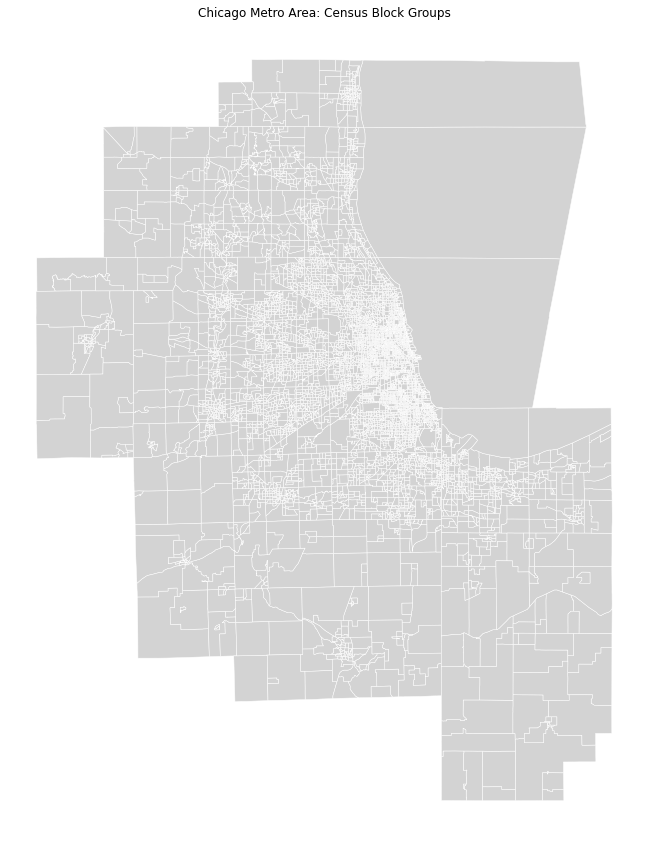

In [35]:
# Preview map
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

In [36]:
# simplify column name
gdf = gdf.rename(columns={'CensusBlockGroup':'cbg'})
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,cbg,State,County,ClassCode,geometry
0,17,031,290900,1,170312909001,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
1,17,031,290900,2,170312909002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
2,17,031,290900,3,170312909003,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
3,17,031,290900,4,170312909004,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
4,17,031,838700,2,170318387002,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...,...
6669,55,059,003002,3,550590030023,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
6670,55,059,000500,4,550590005004,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
6671,55,059,000602,4,550590006024,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."
6672,55,059,000601,5,550590006015,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.89562 42.66896, -87.89489 ..."


In [37]:
# set index for join
gdf = gdf.set_index('cbg')
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry
cbg,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ..."
170312909002,17,031,290900,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ..."
170312909003,17,031,290900,3,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ..."
170312909004,17,031,290900,4,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ..."
170318387002,17,031,838700,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ..."
...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ..."
550590005004,55,059,000500,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ..."
550590006024,55,059,000602,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ..."


In [38]:
gdf = gdf.merge(race_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly
cbg,,,,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ...",935,0,0.000000
170312909002,17,031,290900,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ...",1129,0,0.000000
170312909003,17,031,290900,3,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ...",765,0,0.000000
170312909004,17,031,290900,4,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ...",1075,0,0.000000
170318387002,17,031,838700,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ...",1016,137,13.484252
...,...,...,...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ...",1503,1470,97.804391
550590005004,55,059,000500,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ...",2013,1740,86.438152
550590006024,55,059,000602,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ...",1636,1361,83.190709


In [39]:
gdf = gdf.merge(pov_df, left_index=True, right_index=True)
gdf

,StateFIPS,CountyFIPS,TractCode,BlockGroup,State,County,ClassCode,geometry,pop_total,pop_whiteonly,perc_whiteonly,pop_poverty,poverty_percentage
cbg,,,,,,,,,,,,,
170312909001,17,031,290900,1,IL,Cook County,H1,"MULTIPOLYGON (((-87.73006 41.86610, -87.72982 ...",935,0,0.000000,522,55.828877
170312909002,17,031,290900,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72995 41.86245, -87.72971 ...",1129,0,0.000000,511,45.261293
170312909003,17,031,290900,3,IL,Cook County,H1,"MULTIPOLYGON (((-87.73729 41.86234, -87.73705 ...",765,0,0.000000,299,39.707835
170312909004,17,031,290900,4,IL,Cook County,H1,"MULTIPOLYGON (((-87.73993 41.86596, -87.73977 ...",1075,0,0.000000,326,30.325581
170318387002,17,031,838700,2,IL,Cook County,H1,"MULTIPOLYGON (((-87.72506 41.86252, -87.72482 ...",1016,137,13.484252,315,31.003937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550590030023,55,059,003002,3,WI,Kenosha County,H1,"MULTIPOLYGON (((-88.25640 42.55260, -88.25576 ...",1503,1470,97.804391,162,10.778443
550590005004,55,059,000500,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.84590 42.62461, -87.84590 ...",2013,1740,86.438152,374,18.579235
550590006024,55,059,000602,4,WI,Kenosha County,H1,"MULTIPOLYGON (((-87.85827 42.63217, -87.85817 ...",1636,1361,83.190709,299,18.276284


In [40]:
# Write filtered geojson file to disc
gdf.to_file(target/'ch/ch_census.geojson', driver='GeoJSON')

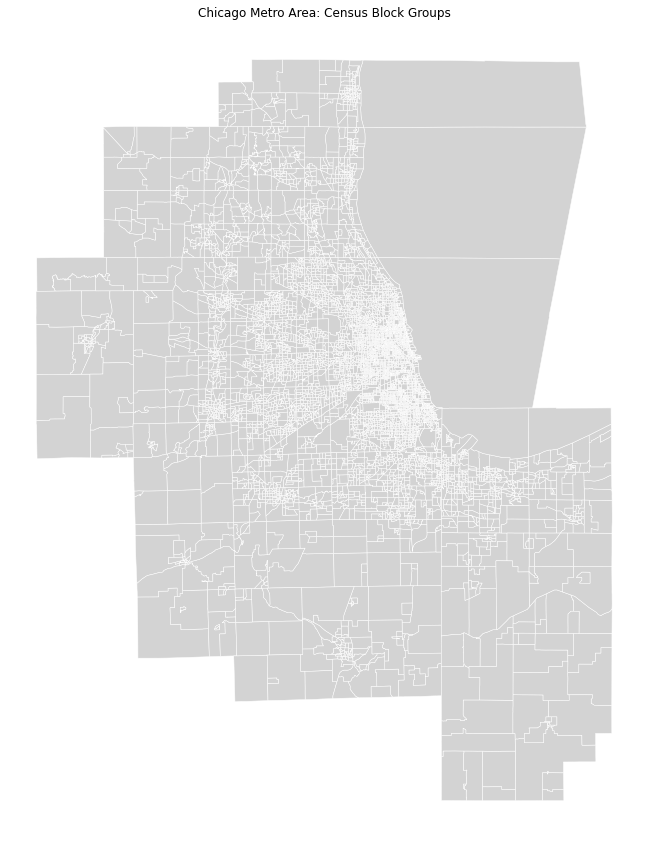

In [41]:
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: Census Block Groups')
ax.axis('off')
gdf.plot(ax=ax, facecolor="lightgray", edgecolor="white", lw=0.5);

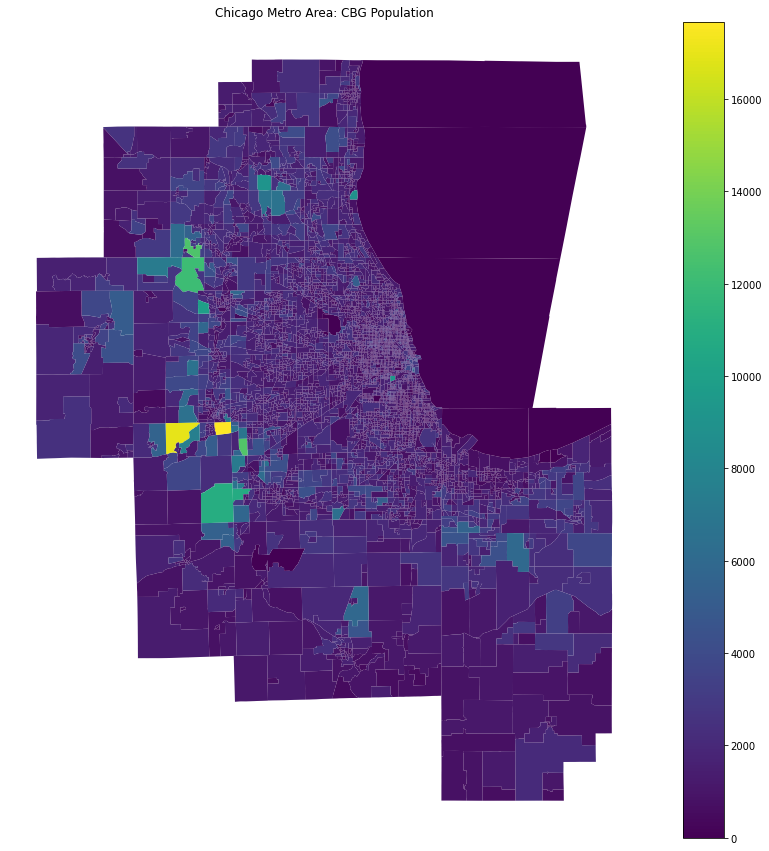

In [42]:
# Plot population size
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Population')
ax.axis('off')
gdf.plot(column='pop_total', ax=ax, legend=True);

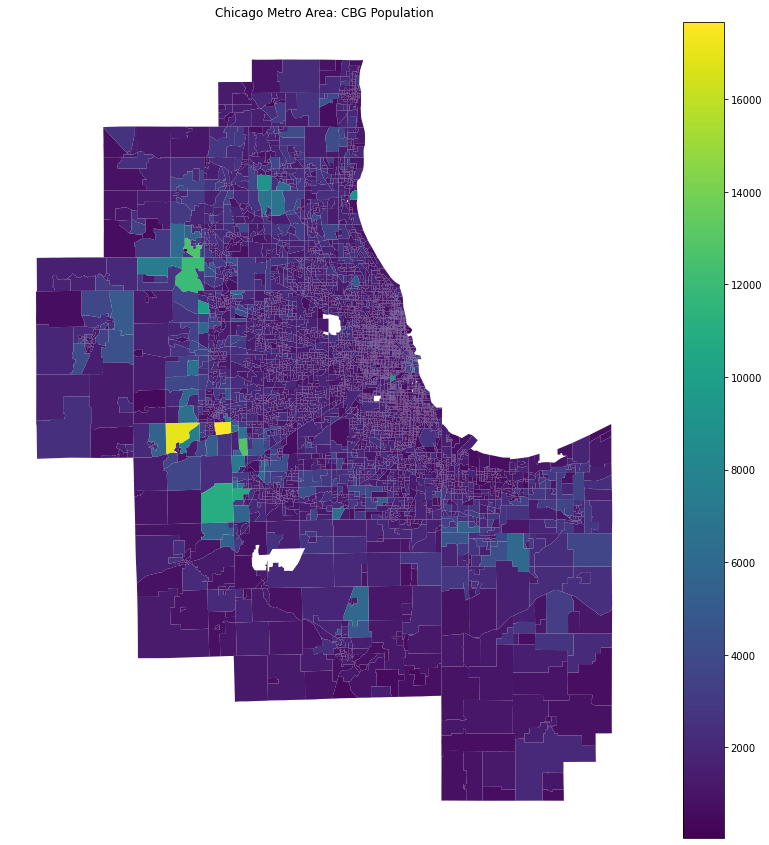

In [43]:
# Pop where not 0
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Population')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='pop_total', ax=ax, legend=True);

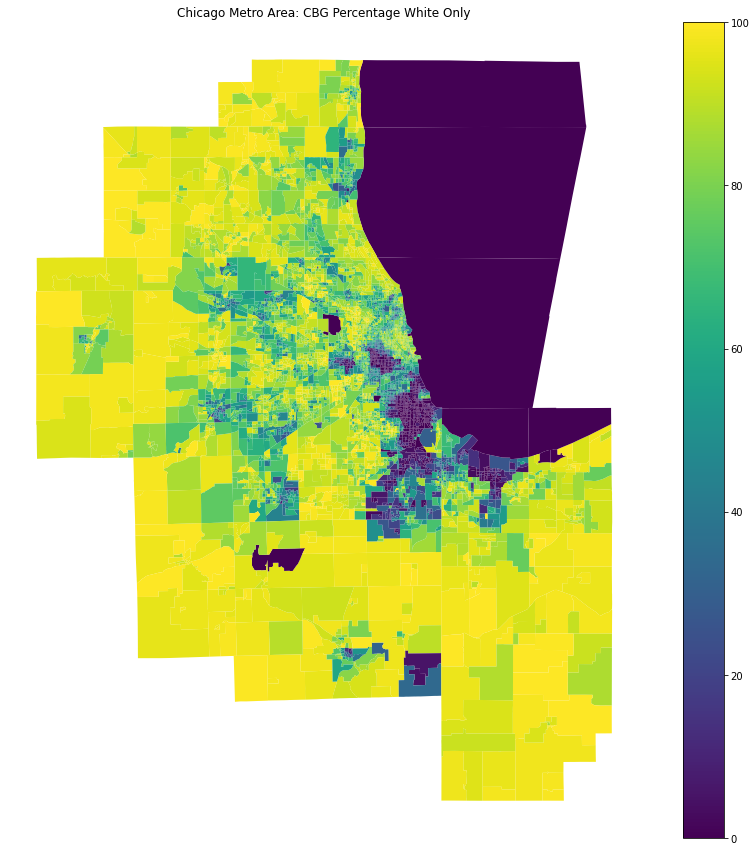

In [44]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf.plot(column='perc_whiteonly', ax=ax, legend=True);

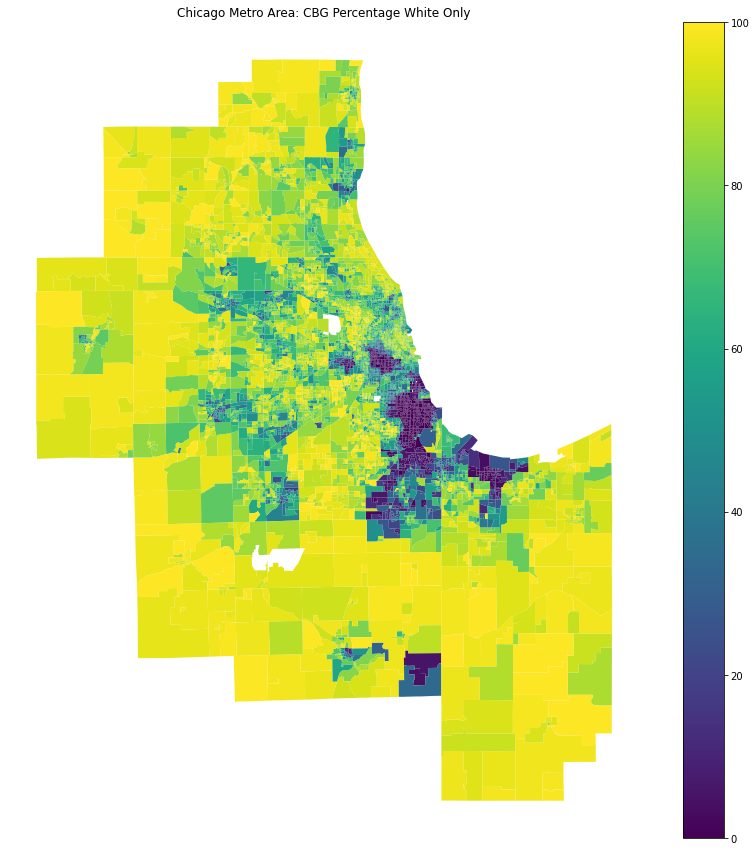

In [45]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage White Only')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='perc_whiteonly', ax=ax, legend=True);

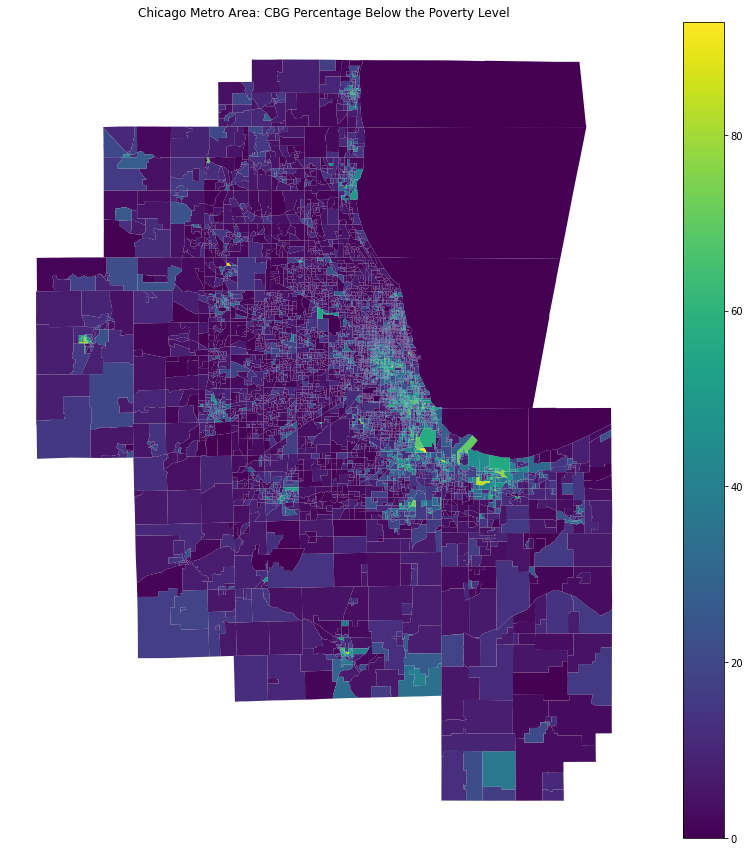

In [46]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf.plot(column='poverty_percentage', ax=ax, legend=True);

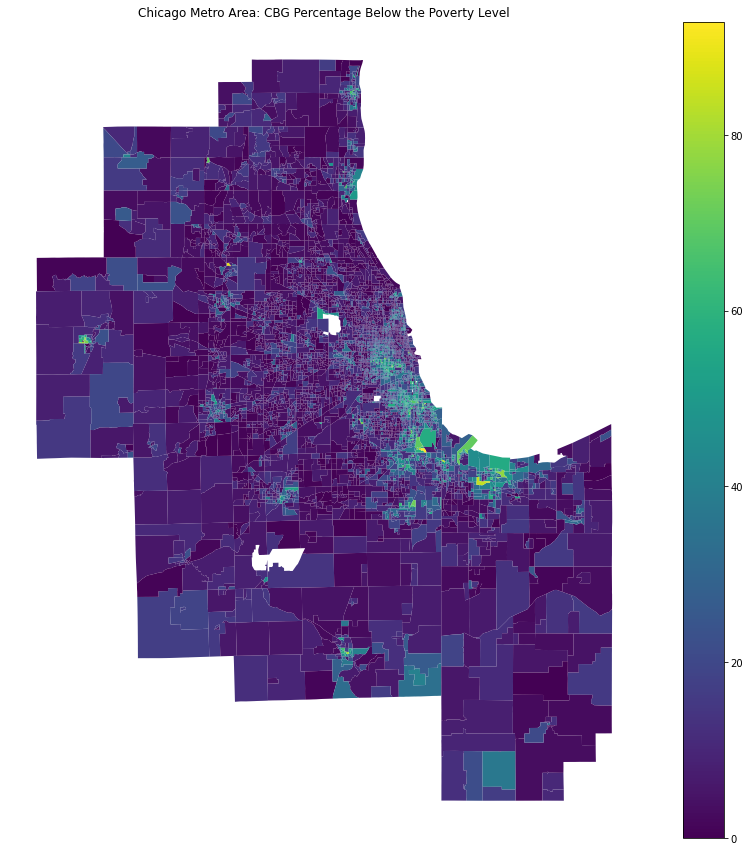

In [47]:
# Plot percent white only
fig, ax = plt.subplots(figsize = (15,15))
ax.title.set_text('Chicago Metro Area: CBG Percentage Below the Poverty Level')
ax.axis('off')
gdf[gdf['pop_total']!=0].plot(column='poverty_percentage', ax=ax, legend=True);

In [48]:
# Extract stats to save
stats_df = gdf[['pop_total','poverty_percentage','perc_whiteonly']]
stats_df

,pop_total,poverty_percentage,perc_whiteonly
cbg,,,
170312909001,935,55.828877,0.000000
170312909002,1129,45.261293,0.000000
170312909003,765,39.707835,0.000000
170312909004,1075,30.325581,0.000000
170318387002,1016,31.003937,13.484252
...,...,...,...
550590030023,1503,10.778443,97.804391
550590005004,2013,18.579235,86.438152
550590006024,1636,18.276284,83.190709


In [49]:
if len(set(stats_df.index)) == len(stats_df.index):
    print('Everything is good, every Row has a unique CBG!')
else:
    print('We have a problem, not every row uas a unique CBG.')

Everything is good, every Row has a unique CBG!


In [50]:
for col in stats_df.columns:
    print('\n')
    print(col)
    print('Min: {}\nMax: {}'.format(stats_df[col].min(), stats_df[col].max()))



pop_total
Min: 0
Max: 17660


poverty_percentage
Min: 0.0
Max: 92.78688524590164


perc_whiteonly
Min: 0.0
Max: 100.0


In [51]:
# Print all Null and NaN values
print('We have {} null values.'.format(len(stats_df[stats_df.isna().any(axis=1)])))

We have 0 null values.


In [52]:
# Write stats to disc
filename = target/'ch/ch.csv'
stats_df.to_csv(filename)